## Imports

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, roc_curve

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

### Major League

In [4]:
MLB_Pitch = pd.read_csv('/Users/kellyjara/Desktop/Project3/Data/MLB PItchers.csv')
MLB_Pitch

,last_name,first_name,player_id,year,p_game,p_formatted_ip,pa,ab,hit,home_run,...,walk,p_earned_run,p_run,p_save,p_blown_save,p_win,p_loss,p_balk,p_era,Unnamed: 20
0,Colon,Bartolo,112526,2015,33,194.2,815,771,217,25,...,24,90,94,0,0,14,13,0,4.16,NaN
1,Burnett,A.J.,150359,2015,26,164.0,699,633,174,11,...,49,58,64,0,0,9,7,1,3.18,NaN
2,Hudson,Tim,218596,2015,24,123.2,525,476,134,13,...,37,61,62,0,0,8,9,0,4.44,NaN
3,Buehrle,Mark,279824,2015,32,198.2,827,768,214,22,...,33,84,100,0,0,15,8,0,3.81,NaN
4,Sabathia,CC,282332,2015,29,167.1,726,659,188,28,...,50,88,92,0,0,6,10,1,4.73,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008,Bradish,Kyle,680694,2023,12,60.0,251,230,60,6,...,16,26,27,0,0,2,3,0,3.90,NaN
1009,Waldichuk,Ken,686610,2023,16,59.2,291,244,77,14,...,39,44,48,1,0,1,5,0,6.64,NaN
1010,Brown,Hunter,686613,2023,14,81.0,332,299,71,8,...,28,34,38,0,0,6,4,0,3.78,NaN
1011,Varland,Louie,686973,2023,10,56.0,241,222,60,14,...,16,33,33,0,0,3,3,0,5.30,NaN


In [5]:
MLB_Pitch.drop(columns = 'Unnamed: 20', inplace = True)

In [6]:
#creating column specifying players are in the major league

In [7]:
MLB_Pitch['League'] = 'Major'

In [8]:
# combining name columns

In [9]:
MLB_Pitch['Name'] = MLB_Pitch[' first_name'].map(str) + ' ' + MLB_Pitch['last_name'].map(str)
MLB_Pitch.head()

,last_name,first_name,player_id,year,p_game,p_formatted_ip,pa,ab,hit,home_run,...,p_earned_run,p_run,p_save,p_blown_save,p_win,p_loss,p_balk,p_era,League,Name
0,Colon,Bartolo,112526,2015,33,194.2,815,771,217,25,...,90,94,0,0,14,13,0,4.16,Major,Bartolo Colon
1,Burnett,A.J.,150359,2015,26,164.0,699,633,174,11,...,58,64,0,0,9,7,1,3.18,Major,A.J. Burnett
2,Hudson,Tim,218596,2015,24,123.2,525,476,134,13,...,61,62,0,0,8,9,0,4.44,Major,Tim Hudson
3,Buehrle,Mark,279824,2015,32,198.2,827,768,214,22,...,84,100,0,0,15,8,0,3.81,Major,Mark Buehrle
4,Sabathia,CC,282332,2015,29,167.1,726,659,188,28,...,88,92,0,0,6,10,1,4.73,Major,CC Sabathia


In [10]:
MLB_Pitch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   last_name       1013 non-null   object 
 1    first_name     1013 non-null   object 
 2   player_id       1013 non-null   int64  
 3   year            1013 non-null   int64  
 4   p_game          1013 non-null   int64  
 5   p_formatted_ip  1013 non-null   float64
 6   pa              1013 non-null   int64  
 7   ab              1013 non-null   int64  
 8   hit             1013 non-null   int64  
 9   home_run        1013 non-null   int64  
 10  strikeout       1013 non-null   int64  
 11  walk            1013 non-null   int64  
 12  p_earned_run    1013 non-null   int64  
 13  p_run           1013 non-null   int64  
 14  p_save          1013 non-null   int64  
 15  p_blown_save    1013 non-null   int64  
 16  p_win           1013 non-null   int64  
 17  p_loss          1013 non-null   i

In [11]:
# Renaming columns to match minor league df

In [12]:
MLB_Pitch.rename(columns = {'p_game':'G','p_formatted_ip':'IP', 'hit':'H'
                            , 'home_run':'HR', 'strikeout':'SO','walk':'BB',
                            'p_earned_run':"ER", 'p_run':'R', 'p_save':'SV',
                            'p_blown_save':'BS', 'p_win':'W', 'p_loss':'L', 'p_balk':'BK',
                            'p_era':'ERA'
                           }, inplace = True)

In [13]:
MLB_Pitch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   last_name    1013 non-null   object 
 1    first_name  1013 non-null   object 
 2   player_id    1013 non-null   int64  
 3   year         1013 non-null   int64  
 4   G            1013 non-null   int64  
 5   IP           1013 non-null   float64
 6   pa           1013 non-null   int64  
 7   ab           1013 non-null   int64  
 8   H            1013 non-null   int64  
 9   HR           1013 non-null   int64  
 10  SO           1013 non-null   int64  
 11  BB           1013 non-null   int64  
 12  ER           1013 non-null   int64  
 13  R            1013 non-null   int64  
 14  SV           1013 non-null   int64  
 15  BS           1013 non-null   int64  
 16  W            1013 non-null   int64  
 17  L            1013 non-null   int64  
 18  BK           1013 non-null   int64  
 19  ERA   

In [14]:
#Dropping columns

In [15]:
MLB_Pitch = MLB_Pitch.drop(columns = ['last_name', ' first_name', 'player_id', 'year','ab','pa'], axis = 1)

In [16]:
MLB_Pitch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   G       1013 non-null   int64  
 1   IP      1013 non-null   float64
 2   H       1013 non-null   int64  
 3   HR      1013 non-null   int64  
 4   SO      1013 non-null   int64  
 5   BB      1013 non-null   int64  
 6   ER      1013 non-null   int64  
 7   R       1013 non-null   int64  
 8   SV      1013 non-null   int64  
 9   BS      1013 non-null   int64  
 10  W       1013 non-null   int64  
 11  L       1013 non-null   int64  
 12  BK      1013 non-null   int64  
 13  ERA     1013 non-null   float64
 14  League  1013 non-null   object 
 15  Name    1013 non-null   object 
dtypes: float64(2), int64(12), object(2)
memory usage: 126.8+ KB


In [17]:
# Reordering columns

In [18]:
MLB_Pitch = MLB_Pitch[['Name', 'League', 'G', 'W','L','IP','H','R','HR','SO','BB','ER','SV','BS','BK','ERA']]
MLB_Pitch.head()

,Name,League,G,W,L,IP,H,R,HR,SO,BB,ER,SV,BS,BK,ERA
0,Bartolo Colon,Major,33,14,13,194.2,217,94,25,136,24,90,0,0,0,4.16
1,A.J. Burnett,Major,26,9,7,164.0,174,64,11,143,49,58,0,0,1,3.18
2,Tim Hudson,Major,24,8,9,123.2,134,62,13,64,37,61,0,0,0,4.44
3,Mark Buehrle,Major,32,15,8,198.2,214,100,22,91,33,84,0,0,0,3.81
4,CC Sabathia,Major,29,6,10,167.1,188,92,28,137,50,88,0,0,1,4.73


### Minor League

In [19]:
Min_Pitch = pd.read_csv('/Users/kellyjara/Desktop/Project3/Data/Minor League Pitchers.csv')
Min_Pitch

,Name,Team,Level,Age,W,L,ERA,G,GS,CG,...,R,ER,HR,BB,IBB,HBP,WP,BK,SO,PlayerId
0,Patrick Schuster,ARI,"AA,AAA",24-26,7,4,3.635762,134,0,0,...,64,61,8,63,1,10,12,1,145,10029
1,Keyvius Sampson,CIN,"A,AA,AAA,R",24-30,12,18,4.017426,74,44,0,...,123,111,18,138,1,8,14,1,245,10039
2,Ashur Tolliver,BAL,"A-,AA,AAA,R",27-29,5,3,3.751708,108,2,0,...,63,61,8,80,1,5,12,1,146,10044
3,Johnny Hellweg,MIL,"A+,AA,AAA",26-29,3,17,5.915731,54,22,0,...,99,78,10,85,0,21,21,2,87,10065
4,Ian Krol,DET,"A+,AAA,R",24-31,10,8,3.831683,177,2,0,...,95,86,18,98,3,13,17,1,234,10066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5873,Tom de Blok,DET,"A,A-,A+",21-23,11,21,3.909502,64,51,0,...,139,128,26,93,0,11,11,2,234,sa971762
5874,Adrian Alcantara,KCR,"A,A+,AA,R",17-23,22,23,4.487738,94,59,1,...,209,183,48,147,1,28,39,11,375,sa974592
5875,Osvaldo Hernandez,SDP,"A,A-,A+,AA,R",19-24,22,23,3.777465,106,69,0,...,178,149,35,102,1,21,26,9,322,sa975541
5876,Parker Curry,LAD,"A,A+,AA,AAA",23-25,15,20,3.916560,97,28,0,...,130,113,33,75,0,2,22,1,280,sa977821


In [20]:
Min_Pitch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5878 entries, 0 to 5877
Data columns (total 27 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5878 non-null   object 
 1   Team      5875 non-null   object 
 2   Level     5878 non-null   object 
 3   Age       5878 non-null   object 
 4   W         5878 non-null   int64  
 5   L         5878 non-null   int64  
 6   ERA       5878 non-null   float64
 7   G         5878 non-null   int64  
 8   GS        5878 non-null   int64  
 9   CG        5878 non-null   int64  
 10  ShO       5878 non-null   int64  
 11  SV        5878 non-null   int64  
 12  BS        5878 non-null   int64  
 13  HLD       0 non-null      float64
 14  IP        5878 non-null   float64
 15  TBF       5878 non-null   int64  
 16  H         5878 non-null   int64  
 17  R         5878 non-null   int64  
 18  ER        5878 non-null   int64  
 19  HR        5878 non-null   int64  
 20  BB        5878 non-null   int6

In [21]:
#Creating column with total number of walks; intentional and unintentional

In [22]:
Min_Pitch['Walks'] = Min_Pitch['BB'] + Min_Pitch['IBB']

In [23]:
Min_Pitch.head()

,Name,Team,Level,Age,W,L,ERA,G,GS,CG,...,ER,HR,BB,IBB,HBP,WP,BK,SO,PlayerId,Walks
0,Patrick Schuster,ARI,"AA,AAA",24-26,7,4,3.635762,134,0,0,...,61,8,63,1,10,12,1,145,10029,64
1,Keyvius Sampson,CIN,"A,AA,AAA,R",24-30,12,18,4.017426,74,44,0,...,111,18,138,1,8,14,1,245,10039,139
2,Ashur Tolliver,BAL,"A-,AA,AAA,R",27-29,5,3,3.751708,108,2,0,...,61,8,80,1,5,12,1,146,10044,81
3,Johnny Hellweg,MIL,"A+,AA,AAA",26-29,3,17,5.915731,54,22,0,...,78,10,85,0,21,21,2,87,10065,85
4,Ian Krol,DET,"A+,AAA,R",24-31,10,8,3.831683,177,2,0,...,86,18,98,3,13,17,1,234,10066,101


In [24]:
# Dropping columns

In [27]:
Min_Pitch = Min_Pitch.drop(columns = ['Team', 'Level', 'GS', 'CG', 'ShO',
                                      'HLD','TBF','IBB','BB','PlayerId','HBP', 
                                      'WP','Age'], axis = 1)

In [28]:
# Adding League Column

In [29]:
Min_Pitch['League'] = 'Minor'

In [30]:
Min_Pitch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5878 entries, 0 to 5877
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    5878 non-null   object 
 1   W       5878 non-null   int64  
 2   L       5878 non-null   int64  
 3   ERA     5878 non-null   float64
 4   G       5878 non-null   int64  
 5   SV      5878 non-null   int64  
 6   BS      5878 non-null   int64  
 7   IP      5878 non-null   float64
 8   H       5878 non-null   int64  
 9   R       5878 non-null   int64  
 10  ER      5878 non-null   int64  
 11  HR      5878 non-null   int64  
 12  BK      5878 non-null   int64  
 13  SO      5878 non-null   int64  
 14  Walks   5878 non-null   int64  
 15  League  5878 non-null   object 
dtypes: float64(2), int64(12), object(2)
memory usage: 734.9+ KB


In [34]:
#Renaming Walk to BB to match MLB df

In [40]:
Min_Pitch.rename(columns = {'Walks':'BB'}, inplace = True)

In [42]:
#Reordering columns

In [43]:
Min_Pitch = Min_Pitch[['Name', 'League', 'G', 'W','L','IP','H','R','HR','SO','BB','ER','SV','BS','BK','ERA']]
Min_Pitch.head()

,Name,League,G,W,L,IP,H,R,HR,SO,BB,ER,SV,BS,BK,ERA
0,Patrick Schuster,Minor,134,7,4,151.0,149,64,8,145,64,61,8,7,1,3.635762
1,Keyvius Sampson,Minor,74,12,18,248.2,221,123,18,245,139,111,0,2,1,4.017426
2,Ashur Tolliver,Minor,108,5,3,146.1,136,63,8,146,81,61,3,7,1,3.751708
3,Johnny Hellweg,Minor,54,3,17,118.2,124,99,10,87,85,78,11,1,2,5.915731
4,Ian Krol,Minor,177,10,8,202.0,201,95,18,234,101,86,21,7,1,3.831683


### Combining Major and Minor League Dataframes

In [48]:
Pitchers = pd.concat([MLB_Pitch, Min_Pitch])
Pitchers

,Name,League,G,W,L,IP,H,R,HR,SO,BB,ER,SV,BS,BK,ERA
0,Bartolo Colon,Major,33,14,13,194.2,217,94,25,136,24,90,0,0,0,4.160000
1,A.J. Burnett,Major,26,9,7,164.0,174,64,11,143,49,58,0,0,1,3.180000
2,Tim Hudson,Major,24,8,9,123.2,134,62,13,64,37,61,0,0,0,4.440000
3,Mark Buehrle,Major,32,15,8,198.2,214,100,22,91,33,84,0,0,0,3.810000
4,CC Sabathia,Major,29,6,10,167.1,188,92,28,137,50,88,0,0,1,4.730000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5873,Tom de Blok,Minor,64,11,21,294.2,277,139,26,234,93,128,1,1,2,3.909502
5874,Adrian Alcantara,Minor,94,22,23,367.0,340,209,48,375,148,183,3,3,11,4.487738
5875,Osvaldo Hernandez,Minor,106,22,23,355.0,364,178,35,322,103,149,0,3,9,3.777465
5876,Parker Curry,Minor,97,15,20,259.2,256,130,33,280,75,113,5,1,1,3.916560


In [49]:
#Creating WHIP Column

In [50]:
Pitchers['WHIP'] = (Pitchers['BB'] + Pitchers['H']) / Pitchers['IP']

In [51]:
#Creating Categorical Column ranking WHIP for each player

In [53]:
def whip_ranks(x):
    if x < 1.20:
        return 'Above Average'
    elif x > 1.40:
        return 'Below Average'
    else: 
        return 'Average'
    
Pitchers['WHIP Ranks'] = Pitchers['WHIP'].apply(whip_ranks)

In [55]:
Pitchers['WHIP Ranks'].value_counts()

Average          3083
Below Average    2510
Above Average    1298
Name: WHIP Ranks, dtype: int64

In [ ]:
# Creating nominal column for WHIP Rank

In [57]:
Pitchers["WHIP_Rank"] = Pitchers["WHIP Ranks"].astype('category')
categories = ["Average","Below Average","Above Average"]
Pitchers["WHIP_Rank"] = Pitchers["WHIP_Rank"].cat.reorder_categories(categories)
Pitchers["WHIP_Rank"] = Pitchers["WHIP_Rank"].cat.codes
Pitchers["WHIP_Rank"].value_counts()

0    3083
1    2510
2    1298
Name: WHIP_Rank, dtype: int64

In [58]:
# Creating a categorical column ranking ERA for each player

In [61]:
def era_ranks(x):
    if x < 3.40:
        return 'Above Average'
    elif x > 4.00:
        return 'Below Average'
    else: 
        return 'Average'
    
Pitchers['ERA Ranks'] = Pitchers['ERA'].apply(era_ranks)

In [62]:
Pitchers['ERA Ranks'].value_counts()

Below Average    3438
Average          1732
Above Average    1721
Name: ERA Ranks, dtype: int64

In [63]:
# Creating nominal column for ERA Rank

In [65]:
Pitchers["ERA_Rank"] = Pitchers["ERA Ranks"].astype('category')
categories = ["Below Average","Average","Above Average"]
Pitchers["ERA_Rank"] = Pitchers["ERA_Rank"].cat.reorder_categories(categories)
Pitchers["ERA_Rank"] = Pitchers["ERA_Rank"].cat.codes
Pitchers["ERA_Rank"].value_counts()

0    3438
1    1732
2    1721
Name: ERA_Rank, dtype: int64

In [68]:
# Creating a nomial column for league

In [70]:
Pitchers['League'].value_counts()

Minor    5878
Major    1013
Name: League, dtype: int64

In [72]:
Pitchers["Leagues"] = Pitchers["League"].astype('category')
categories = ["Minor","Major"]
Pitchers["Leagues"] = Pitchers["Leagues"].cat.reorder_categories(categories)
Pitchers["Leagues"] = Pitchers["Leagues"].cat.codes
Pitchers["Leagues"].value_counts()

0    5878
1    1013
Name: Leagues, dtype: int64

In [67]:
### Preprocessing Min League

In [76]:
base_feats = ['G', 'W','L','IP','H','R','HR','SO','BB','ER','SV',
              'BS','BK','ERA','WHIP']

In [77]:
X = Pitchers[base_feats]
y = Pitchers['Leagues']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

In [78]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [79]:
# y-values

In [81]:
y_train.value_counts(normalize=True)

0    0.855069
1    0.144931
Name: Leagues, dtype: float64

In [82]:
y_test.value_counts(normalize=True)

0    0.848162
1    0.151838
Name: Leagues, dtype: float64

In [83]:
Pit_Model = LogisticRegression(random_state=42)
Pit_Model.fit(X_train_scaled, y_train)
preds = Pit_Model.predict(X_test_scaled)

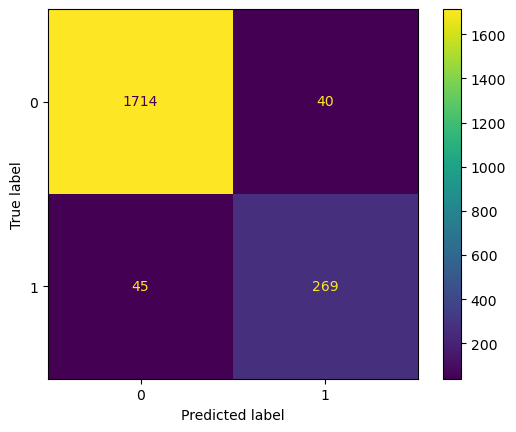

In [85]:
Pitchers_CM =confusion_matrix(y_test,preds);
ConfusionMatrixDisplay(Pitchers_CM).plot()

In [86]:
test_preds = Pit_Model.predict(X_test_scaled)

In [87]:
accuracy = accuracy_score(y_test, test_preds)
print(accuracy)
precision = precision_score(y_test, test_preds)
print(precision)
recall = recall_score(y_test, test_preds)
print(recall)
f1 = f1_score(y_test, test_preds)
print(f1)

0.9588974854932302
0.8705501618122977
0.856687898089172
0.8635634028892455
